# 利用 K-means 演算法對 60 檔加密貨幣做分群
* 總共 60 種加密貨幣
* 2019/9/1 ~ 2020/9/30 幣安現貨每小時收盤價

In [1]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering

In [2]:
path = os.getcwd()

In [3]:
df = pd.read_csv(path + '/crypto_data.csv', index_col = 'Datetime', parse_dates = True)
df

,BTCUSDT,ETHUSDT,BNBUSDT,NEOUSDT,LTCUSDT,ADAUSDT,XRPUSDT,EOSUSDT,TUSDUSDT,IOTAUSDT,...,MTLUSDT,TOMOUSDT,PERLUSDT,DENTUSDT,MFTUSDT,KEYUSDT,DOCKUSDT,WANUSDT,FUNUSDT,CVCUSDT
Datetime,,,,,,,,,,,,,,,,,,,,,
2019-09-01 00:00:00,9617.06,172.45,21.3579,8.828,64.70,0.04495,0.25837,3.3235,0.9995,0.2477,...,0.4065,0.4715,0.08690,0.000461,0.001042,0.001425,0.006412,0.3422,0.002698,0.04071
2019-09-01 01:00:00,9614.99,172.71,21.4553,8.830,64.66,0.04504,0.25754,3.3259,0.9988,0.2478,...,0.4050,0.4756,0.08690,0.000461,0.001047,0.001425,0.006400,0.3381,0.002723,0.04089
2019-09-01 02:00:00,9605.78,172.43,21.3114,8.820,64.60,0.04487,0.25697,3.3130,0.9991,0.2468,...,0.4047,0.4724,0.08650,0.000460,0.001046,0.001425,0.006400,0.3360,0.002726,0.04048
2019-09-01 03:00:00,9623.02,172.57,21.4323,8.849,64.81,0.04503,0.25772,3.3176,0.9993,0.2478,...,0.4045,0.4715,0.08620,0.000460,0.001040,0.001425,0.006375,0.3392,0.002693,0.04048
2019-09-01 04:00:00,9614.46,172.46,21.5311,8.833,64.82,0.04515,0.25713,3.3248,0.9991,0.2474,...,0.4040,0.4752,0.08610,0.000460,0.001039,0.001425,0.006329,0.3387,0.002700,0.04019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30 06:00:00,43371.92,3021.40,376.8000,38.460,151.50,2.09300,0.94410,3.8880,1.0000,1.0892,...,2.8330,2.0910,0.07795,0.004470,0.009580,0.007281,0.081130,0.7495,0.018580,0.43520
2021-09-30 07:00:00,43286.88,3001.59,375.1000,38.110,150.70,2.08500,0.94160,3.8750,1.0000,1.0858,...,2.8120,2.1080,0.07802,0.004435,0.009615,0.007238,0.080580,0.7441,0.018530,0.43620
2021-09-30 08:00:00,43062.03,2976.56,373.5000,37.880,150.00,2.07200,0.93390,3.8560,1.0000,1.0743,...,2.8080,2.0710,0.07692,0.004428,0.009513,0.007170,0.080350,0.7409,0.018510,0.43300


In [4]:
# 是否有缺漏值
df.isnull().any().all()

False

In [5]:
df_2019 = df.loc['2019-09-01':'2020-08-31']
df_2020 = df.loc['2020-09-01':]

## 資料處理
1. 取參數
2. 標準化
3. 刪除離群值

In [6]:
def get_features(df, outlier_std):

    ## log return
    log_ret = np.log(df/df.shift(1))[1:]

    ## feature engirneering
    mean = log_ret.mean()
    std = log_ret.std()
    skew = log_ret.skew()
    kurt = log_ret.kurt()
    
    print('before row:', len(mean))
    
    ## standardized
    standard_mean = (mean - mean.mean()) / mean.std()
    standard_std = (std - std.mean()) / std.std()
    standard_skew = (skew - skew.mean()) / skew.std()
    standard_kurt = (kurt - kurt.mean()) / kurt.std()
    
    ## remove outliers
    features = pd.DataFrame({'mean':standard_mean, 'std':standard_std, 'skew':standard_skew, 'kurt':standard_kurt})
    features = features[(abs(features) > outlier_std) == False].dropna()
    
    print('after row:', len(features))
    return features

In [7]:
features_2019 = get_features(df = df_2019, outlier_std = 2)

before row: 60
after row: 52


In [8]:
features_2019.head(2)

,mean,std,skew,kurt
BTCUSDT,-0.389254,-1.435759,-1.007337,0.738998
ETHUSDT,0.704156,-1.070515,-0.955507,0.186898


In [9]:
features_2020 = get_features(df = df_2020, outlier_std = 2)

before row: 60
after row: 56


In [10]:
features_2020.head(2)

,mean,std,skew,kurt
BTCUSDT,-0.156593,-1.169578,-0.168095,-0.155980
ETHUSDT,0.351400,-0.859241,-0.201200,-0.159164


## 分群演算法
1. K-means（基於**距離**的分群算法）
2. Spectral Clustering（基於**密度**的分群算法）
* https://ithelp.ithome.com.tw/articles/10207518

> 結論：兩種算法的效果相近

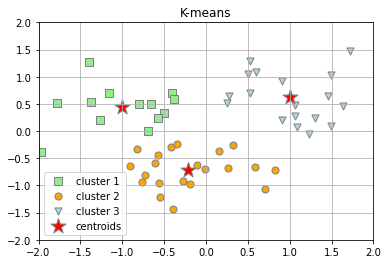

In [11]:
# K-means 先用前兩個參數繪圖觀察
arr = np.array(features_2019[['mean', 'std']])

km = KMeans(n_clusters = 3, init = 'random', n_init = 10, max_iter = 100, tol = 1e-04, random_state = 0)
y_km = km.fit_predict(arr)

# Draw the 3 clusters
plt.scatter(arr[y_km == 0, 0], arr[y_km == 0, 1], s = 50, c = 'lightgreen', marker = 's', edgecolor = 'gray', label = 'cluster 1')
plt.scatter(arr[y_km == 1, 0], arr[y_km == 1, 1], s = 50, c = 'orange', marker = 'o', edgecolor = 'gray', label = 'cluster 2')
plt.scatter(arr[y_km == 2, 0], arr[y_km == 2, 1], s = 50, c = 'lightblue', marker = 'v', edgecolor = 'gray', label = 'cluster 3')

# Draw the centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s = 250, marker = '*', c = 'red', edgecolor = 'gray', 
            label = 'centroids')

plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.title('K-means')
plt.legend(scatterpoints = 1)
plt.grid()
plt.show()

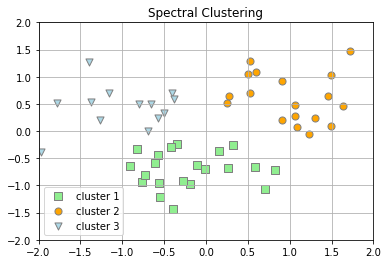

In [12]:
# Spectral Clustering 先用前兩個參數繪圖觀察
arr = np.array(features_2019[['mean', 'std']])

model = SpectralClustering(n_clusters = 3, affinity = 'nearest_neighbors', assign_labels = 'kmeans')
labels = model.fit_predict(arr)

# Draw the 3 clusters
plt.scatter(arr[labels == 0, 0], arr[labels == 0, 1], s = 50, c = 'lightgreen', marker = 's', edgecolor = 'gray', label = 'cluster 1')
plt.scatter(arr[labels == 1, 0], arr[labels == 1, 1], s = 50, c = 'orange', marker = 'o', edgecolor = 'gray', label = 'cluster 2')
plt.scatter(arr[labels == 2, 0], arr[labels == 2, 1], s = 50, c = 'lightblue', marker = 'v', edgecolor = 'gray', label = 'cluster 3')

plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.title('Spectral Clustering')
plt.legend(scatterpoints = 1)
plt.grid()
plt.show()

## 全樣本觀察
> 結論：使用 K-means 演算法，分成三群效果最好

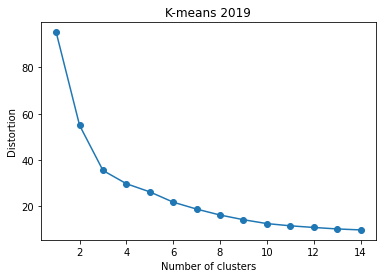

In [13]:
arr = np.array(features_2019)

distortions = []
for i in range(1, 15):
    km = KMeans(n_clusters = i, init = 'random', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
    km.fit(arr)
    distortions.append(km.inertia_) # distance of each center
    
# Draw figures
plt.title('K-means 2019')
plt.plot(range(1, 15), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

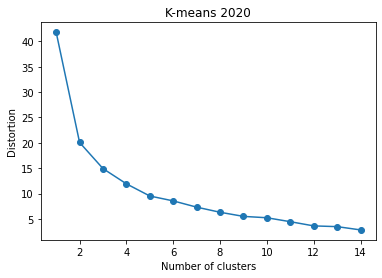

In [14]:
arr = np.array(features_2020)

distortions = []
for i in range(1, 15):
    km = KMeans(n_clusters = i, init = 'random', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
    km.fit(arr)
    distortions.append(km.inertia_) # distance of each center
    
# Draw figures
plt.title('K-means 2020')
plt.plot(range(1, 15), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

## 兩年數據觀察

In [15]:
arr_2019 = np.array(features_2019)

km = KMeans(n_clusters = 3, init = 'random', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
y_km = km.fit_predict(arr_2019)
features_2019['group'] = y_km
features_2019 = features_2019.sort_values('group', ascending = False)
features_2019

,mean,std,skew,kurt,group
THETAUSDT,1.463831,0.649692,-0.015694,-0.529716,2
ENJUSDT,1.068502,0.475396,0.330532,-0.489760,2
FETUSDT,0.523868,0.707620,-0.262033,-0.448594,2
ZRXUSDT,1.307401,0.239074,0.309018,-0.538364,2
ZILUSDT,1.069268,0.271600,0.062235,-0.463587,2
WAVESUSDT,1.090060,0.066265,0.154671,-0.465028,2
VETUSDT,1.496832,0.091206,0.125739,-0.437514,2
ICXUSDT,0.913932,0.199018,0.217892,-0.500657,2
OMGUSDT,1.642686,0.459330,0.978755,0.530453,2
CELRUSDT,0.278846,0.651387,-0.037395,-0.486122,2


In [16]:
arr_2020 = np.array(features_2020)

km = KMeans(n_clusters = 3, init = 'random', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
y_km = km.fit_predict(arr_2020)
features_2020['group'] = y_km
features_2020 = features_2020.sort_values('group', ascending = False)
features_2020

,mean,std,skew,kurt,group
BTCUSDT,-0.156593,-1.169578,-0.168095,-0.155980,2
ICXUSDT,-0.467871,-0.143784,-0.160983,-0.152517,2
ZECUSDT,-0.996986,-0.363377,-0.351132,-0.102585,2
XMRUSDT,-0.430742,-0.641750,-0.336524,-0.103380,2
BATUSDT,-0.766531,-0.395418,-0.169091,-0.136437,2
ZRXUSDT,-0.960917,-0.210536,-0.225073,-0.127770,2
ALGOUSDT,-0.288995,-0.230604,-0.148275,-0.158476,2
DUSKUSDT,-0.925969,-0.069982,-0.113345,-0.159584,2
COSUSDT,-0.813811,-0.059734,-0.101422,-0.151945,2
LINKUSDT,-0.891762,-0.421445,-0.229079,-0.151269,2


In [17]:
nice_2019 = sorted(features_2019[features_2019['group'] == 2].index)

In [18]:
nice_2020 = sorted(features_2020[features_2020['group'] == 1].index)

In [19]:
nice_2019

['ANKRUSDT',
 'ATOMUSDT',
 'CELRUSDT',
 'DOCKUSDT',
 'ENJUSDT',
 'FETUSDT',
 'FTMUSDT',
 'ICXUSDT',
 'MFTUSDT',
 'OMGUSDT',
 'TFUELUSDT',
 'THETAUSDT',
 'TOMOUSDT',
 'VETUSDT',
 'WAVESUSDT',
 'ZILUSDT',
 'ZRXUSDT']

In [20]:
nice_2020

['ADAUSDT',
 'BNBUSDT',
 'CELRUSDT',
 'CVCUSDT',
 'DENTUSDT',
 'FTMUSDT',
 'HOTUSDT',
 'MATICUSDT',
 'ONEUSDT',
 'TFUELUSDT',
 'THETAUSDT']

## 來看一下連續兩年都被選中的垃圾幣
* CELR
* FTM
* TFUEL
* THETA

In [21]:
df = df.loc[:,['CELRUSDT', 'FTMUSDT', 'TFUELUSDT', 'THETAUSDT']]

In [22]:
# 單利計算報酬率
ret = ((df - df.shift(1)) / df.iloc[0]).fillna(1)
cum_ret = ret.cumsum()
cum_ret

,CELRUSDT,FTMUSDT,TFUELUSDT,THETAUSDT
Datetime,,,,
2019-09-01 00:00:00,1.000000,1.000000,1.000000,1.000000
2019-09-01 01:00:00,1.001724,0.992840,1.002079,0.988942
2019-09-01 02:00:00,0.986207,0.991647,0.993763,0.986747
2019-09-01 03:00:00,0.998276,0.979714,0.997921,0.986396
2019-09-01 04:00:00,0.998276,0.981504,0.997921,0.991838
...,...,...,...,...
2021-09-30 06:00:00,25.113793,73.305489,53.804574,43.961734
2021-09-30 07:00:00,24.655172,72.505967,53.617464,43.522907
2021-09-30 08:00:00,24.060345,72.118138,52.702703,43.329823


In [23]:
# 複利計算報酬率
equity = df.pct_change().fillna(0)
equity += 1
equity = equity.cumprod()
equity

,CELRUSDT,FTMUSDT,TFUELUSDT,THETAUSDT
Datetime,,,,
2019-09-01 00:00:00,1.000000,1.000000,1.000000,1.000000
2019-09-01 01:00:00,1.001724,0.992840,1.002079,0.988942
2019-09-01 02:00:00,0.986207,0.991647,0.993763,0.986747
2019-09-01 03:00:00,0.998276,0.979714,0.997921,0.986396
2019-09-01 04:00:00,0.998276,0.981504,0.997921,0.991838
...,...,...,...,...
2021-09-30 06:00:00,25.113793,73.305489,53.804574,43.961734
2021-09-30 07:00:00,24.655172,72.505967,53.617464,43.522907
2021-09-30 08:00:00,24.060345,72.118138,52.702703,43.329823


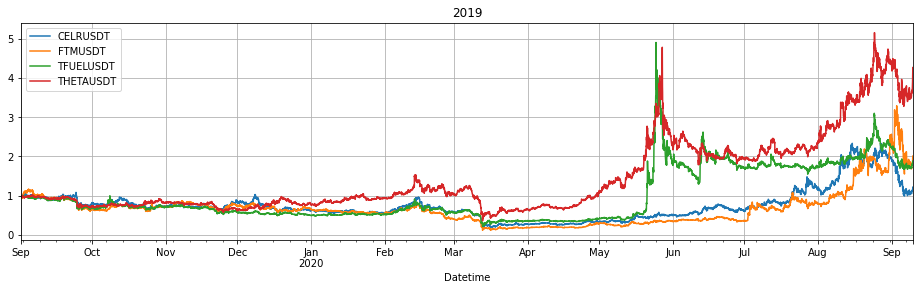

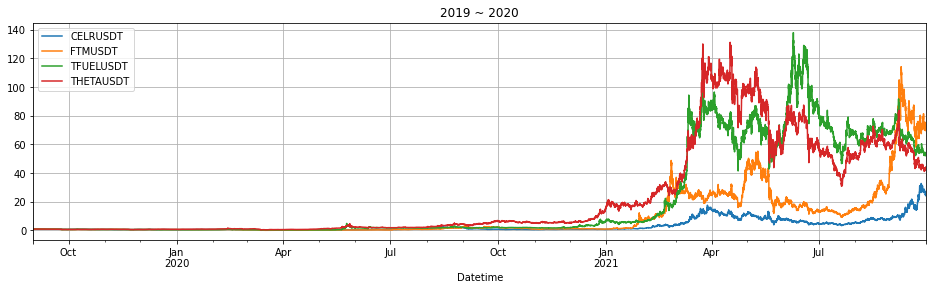

In [24]:
equity.iloc[:9000].plot(grid = True, figsize =(16, 4), title = '2019');
equity.plot(grid = True, figsize =(16, 4), title = '2019 ~ 2020');

In [26]:
# 1元投入，兩年後爆炸成長 24 ~ 72 倍（兩年報酬率 2311% ~ 7143%）
cum_ret.iloc[-1]

CELRUSDT     24.110345
FTMUSDT      72.434368
TFUELUSDT    52.557173
THETAUSDT    43.575566
Name: 2021-09-30 10:00:00, dtype: float64

In [25]:
# 1元投入，兩年後爆炸成長 24 ~ 72 倍（兩年報酬率 2311% ~ 7143%）
equity.iloc[-1]

CELRUSDT     24.110345
FTMUSDT      72.434368
TFUELUSDT    52.557173
THETAUSDT    43.575566
Name: 2021-09-30 10:00:00, dtype: float64

# Next issue, how to find it?